# Text data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Bag of Words (BoW)
- document-term matrix
- tfidf

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [8]:
corpus = [
    'This is the first document document',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]

In [9]:
vect = CountVectorizer()
X = vect.fit_transform(corpus)

In [10]:
X.toarray()

array([[0, 2, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [11]:
vect.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [12]:
vect = TfidfVectorizer()
X = vect.fit_transform(corpus)

In [16]:
X.toarray().round(2)

array([[0.  , 0.73, 0.45, 0.3 , 0.  , 0.  , 0.3 , 0.  , 0.3 ],
       [0.  , 0.69, 0.  , 0.28, 0.  , 0.54, 0.28, 0.  , 0.28],
       [0.51, 0.  , 0.  , 0.27, 0.51, 0.  , 0.27, 0.51, 0.27],
       [0.  , 0.47, 0.58, 0.38, 0.  , 0.  , 0.38, 0.  , 0.38]])

In [17]:
print(X.toarray().round(1))
print(vect.get_feature_names())

[[0.  0.7 0.5 0.3 0.  0.  0.3 0.  0.3]
 [0.  0.7 0.  0.3 0.  0.5 0.3 0.  0.3]
 [0.5 0.  0.  0.3 0.5 0.  0.3 0.5 0.3]
 [0.  0.5 0.6 0.4 0.  0.  0.4 0.  0.4]]
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [18]:
vect = TfidfVectorizer(ngram_range=[1,2], stop_words='english')
X = vect.fit_transform(corpus)
print(X.toarray().round(1))
print(vect.get_feature_names())

[[0.8 0.6 0.  0.  0. ]
 [0.6 0.  0.5 0.5 0.5]
 [0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]]
['document', 'document document', 'document second', 'second', 'second document']


### practical example

In [19]:
!curl -L https://bit.ly/2WC9nvn -o spam.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   141  100   141    0     0    245      0 --:--:-- --:--:-- --:--:--   245

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100  488k  100  488k    0     0   205k      0  0:00:02  0:00:02 --:--:-- 2531k


In [21]:
sms = pd.read_csv('spam.csv', encoding='latin-1')


In [25]:
sms.tail(3)

,type,text
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...
5573,ham,Rofl. Its true to its name


In [26]:
sms.columns = ['category', 'text']
sms.head(3)

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [27]:
sms['category'].value_counts()

ham     4827
spam     747
Name: category, dtype: int64

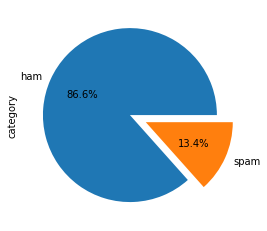

In [28]:
sms['category'].value_counts().plot(kind='pie', explode=[0, 0.2], autopct='%1.1f%%')

In [29]:
sms.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
sms_corpus = sms['text']

In [38]:
# 연습
tmp = CountVectorizer()
X = tmp.fit_transform(sms_corpus)
print(X.toarray().shape)
tmp.get_feature_names()

(5574, 8745)


['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

In [39]:
vect = CountVectorizer(min_df=10, stop_words='english')

In [40]:
X = vect.fit_transform(sms_corpus)

In [41]:
X.shape

(5574, 837)

In [46]:
X.toarray().sum(0).argsort()[-5:][::-1]

array([751, 373, 306, 426, 510], dtype=int64)

In [47]:
# 5 most frequently appeared words
iidx = X.toarray().sum(0).argsort()[-5:][::-1]
iidx
[vect.get_feature_names()[i] for i in iidx]

['ur', 'just', 'gt', 'lt', 'ok']

In [16]:
vect = TfidfVectorizer(min_df=10, stop_words='english')
X = vect.fit_transform(sms_corpus)
iidx = X.toarray().sum(0).argsort()[-5:][::-1]
print([vect.get_feature_names()[i] for i in iidx])
print([X.toarray().sum(0)[i] for i in iidx])

['ok', 'just', 'll', 'ur', 'come']
[122.06978727192575, 106.16332625717925, 96.57382567023429, 91.57779277147964, 87.15189392798636]


### word cloud

In [48]:
spam_sms = sms[sms["category"] == "spam"]["text"]
ham_sms = sms[sms["category"] == "ham"]["text"]

spam_words = []
ham_words = []

In [49]:
spam_sms.values.shape

(747,)

In [51]:
!pip install nltk

In [52]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rtaje\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rtaje\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [53]:
for i in range(spam_sms.values.shape[0]):
    msg = spam_sms.values[i]
    words = [word.lower() for word in word_tokenize(msg)
                              if word.lower() not in stopwords.words('english') and
                                 word.lower().isalpha()]
    spam_words = spam_words + words

In [54]:
len(spam_words)

9411

In [50]:
!pip install wordcloud

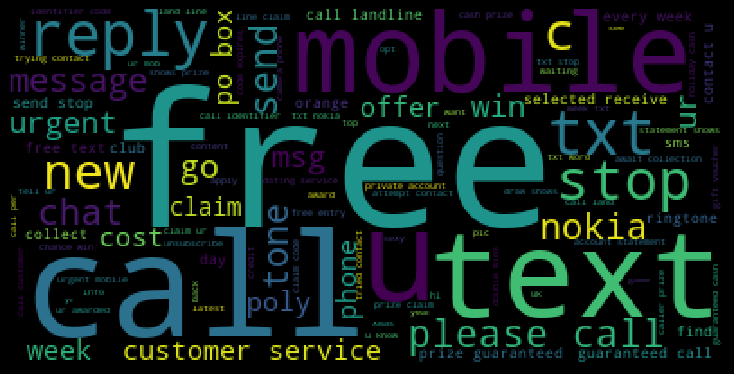

In [55]:
from wordcloud import WordCloud
wc = WordCloud(width=400, height=200)
spam_wordcloud = wc.generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

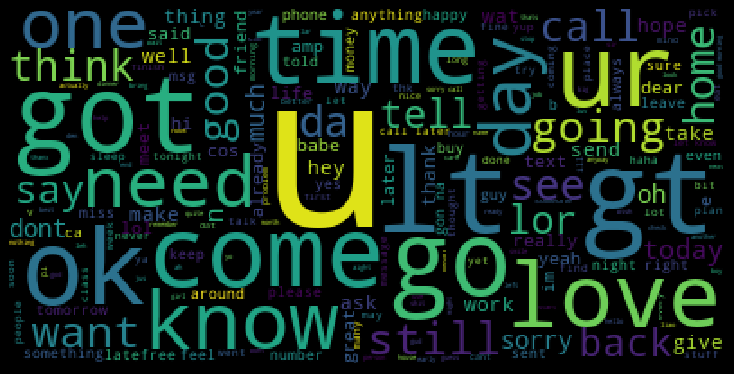

In [56]:
for i in range(ham_sms.values.shape[0]):
    msg = ham_sms.values[i]
    words = [word.lower() for word in word_tokenize(msg) 
                               if word.lower() not in stopwords.words('english') and
                                  word.lower().isalpha()]
    ham_words = ham_words + words
    
wc = WordCloud(width=400, height=200)
ham_wordcloud = wc.generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Word Embedding
- word vector

In [57]:
!pip install gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.15
    Uninstalling Cython-0.29.15:
      Successfully uninstalled Cython-0.29.15


In [87]:
from gensim.models.word2vec import Word2Vec

In [88]:
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]

In [90]:
model = Word2Vec(sentences, min_count=1, vector_size=5)

In [91]:
print(model)

Word2Vec(vocab=14, vector_size=5, alpha=0.025)


In [92]:
# words = list(model.wv.vocab)   # summarize the vocabulary
words = list(model.wv.key_to_index)
words

['sentence',
 'the',
 'is',
 'this',
 'final',
 'and',
 'more',
 'one',
 'another',
 'yet',
 'second',
 'word2vec',
 'for',
 'first']

In [93]:
# model['sentence','this']
model.wv['sentence','this']

array([[-0.01072454,  0.0047286 ,  0.10206699,  0.18018547, -0.186059  ],
       [-0.03632035,  0.0575316 ,  0.01983747, -0.1657043 , -0.18897638]],
      dtype=float32)

In [94]:
# dim 5 --> dim 2  (dimension reduction)
from sklearn.decomposition import PCA


In [95]:
# X = model[model.wv.vocab]
X = model.wv[model.wv.key_to_index]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [96]:
result

array([[ 0.15687977,  0.07380531],
       [ 0.00975127,  0.16295709],
       [ 0.07901841, -0.07940323],
       [-0.06276731,  0.20023076],
       [ 0.15711929, -0.12162264],
       [ 0.03085463,  0.14383443],
       [ 0.0536552 ,  0.16002823],
       [-0.14077972,  0.00701869],
       [-0.2551937 , -0.02434064],
       [ 0.26279023, -0.16265643],
       [-0.12857188, -0.17765631],
       [-0.16851811, -0.18855847],
       [-0.10917117,  0.02707585],
       [ 0.11493316, -0.02071275]], dtype=float32)

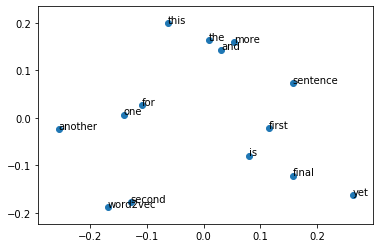

In [97]:
plt.scatter(result[:,0], result[:,1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.show()

In [98]:
model.wv[words]

array([[-0.01072454,  0.0047286 ,  0.10206699,  0.18018547, -0.186059  ],
       [-0.14233617,  0.12917742,  0.17945977, -0.10030856, -0.07526746],
       [ 0.1476101 , -0.03066945, -0.09073229,  0.13108101, -0.09720321],
       [-0.03632035,  0.0575316 ,  0.01983747, -0.1657043 , -0.18897638],
       [ 0.14623532,  0.10140524,  0.13515386,  0.01525731,  0.12701778],
       [-0.06810732, -0.01892805,  0.11537147, -0.15043278, -0.0787221 ],
       [-0.15023164, -0.01860085,  0.19076237, -0.14638333, -0.0466754 ],
       [-0.03875484,  0.1615487 , -0.11861791,  0.00090322, -0.0950747 ],
       [-0.192071  ,  0.10014586, -0.17519173, -0.0878365 , -0.000702  ],
       [-0.00594486, -0.15322231,  0.19228634,  0.09963705,  0.18467292],
       [-0.16315837,  0.08991595, -0.08274154,  0.0164907 ,  0.16997238],
       [-0.08924355,  0.09035001, -0.13573924, -0.07096978,  0.18797016],
       [-0.03155308,  0.00642743, -0.08281259, -0.15365377, -0.03016019],
       [ 0.0493959 , -0.01776056,  0.1

In [99]:
# model.most_similar('word2vec')
model.wv.most_similar('word2vec')

[('second', 0.888822078704834),
 ('another', 0.7012775540351868),
 ('for', 0.4032686650753021),
 ('one', 0.26315250992774963),
 ('final', 0.007923845201730728),
 ('the', -0.08796896785497665),
 ('yet', -0.13303124904632568),
 ('more', -0.15925809741020203),
 ('first', -0.2230328619480133),
 ('this', -0.2520391643047333)]

In [100]:
# model.similarity('sentence', 'word2vec')
model.wv.similarity('sentence', 'word2vec')

-0.7897248